# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [165]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [166]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [167]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [168]:
df_train.shape

(15223, 52)

In [169]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [170]:
df_test.shape

(14910, 52)

In [171]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [172]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [173]:
df = df_test.append(df_train).reset_index(drop=True)

In [174]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [176]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Неоконченное высшее', 'Среднее специальное', 'Два и более высших образования', 'Среднее', 'Неполное среднее', 'Высшее'}


MARITAL_STATUS
{'Состою в браке', 'Разведен(а)', 'Гражданский брак', 'Вдовец/Вдова', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Наука', 'Сборочные производства', 'Управляющая компания', 'Сельское хозяйство', 'Информационные технологии', 'Логистика', 'Государственная служба', 'Торговля', 'Банк/Финансы', 'Энергетика', 'Недвижимость', 'ЧОП/Детективная д-ть', 'Салоны красоты и здоровья', 'Туризм', 'СМИ/Реклама/PR-агенства', 'Ресторанный бизнес/Общественное питание', 'Подбор персонала', 'Образование', 'Транспорт', 'Здравоохранение', 'Нефтегазовая промышленность', 'Страхование', 'Информационные услуги', 'Маркетинг', 'Развлечения/Искусство', 'Другие сферы', 'Коммунальное хоз-во/Дорожные службы', 'Химия/Парфюмерия/Фармацевтика', 'Металлургия/Промышленность/Машиностроение', 'Строительство', 'Юридические услуги/нотариальные услуги'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [177]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

В данных есть пропуски в столбцах: GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, TP_PROVINCE, WORK_TIME, PREVIOUS_CARD_NUM_UTILIZED.
Я буду заполнять пропуски медианой.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Есть категориальные признаки, нужно использовать OneHotEncoding для кодировки данных

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [178]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    # drop AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    # Convert object to float type for columns PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    # OneHotEncoding for categorial features
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'])
    
    # Fill null-values features with median for specific column
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = df_output['WORK_TIME'].median()
    df_output.loc[df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].median()

    # Fill null-values categorial features with median
    filter_gen_industry_cols = [col for col in df if col.startswith('GEN_INDUSTRY_')]
    for i in filter_gen_industry_cols:
        df_output.loc[df_output[i].isnull(), i] = df_output[i].median()

    filter_gen_title_cols = [col for col in df if col.startswith('GEN_TITLE_')]
    for i in filter_gen_title_cols:
        df_output.loc[df_output[i].isnull(), i] = df_output[i].median()

    filter_org_tp_state_cols = [col for col in df if col.startswith('ORG_TP_STATE_')]
    for i in filter_org_tp_state_cols:
        df_output.loc[df_output[i].isnull(), i] = df_output[i].median()

    filter_org_tp_fcapital_cols = [col for col in df if col.startswith('ORG_TP_FCAPITAL_')]
    for i in filter_org_tp_fcapital_cols:
        df_output.loc[df_output[i].isnull(), i] = df_output[i].median()
    
    filter_job_dir_cols = [col for col in df if col.startswith('JOB_DIR_')]
    for i in filter_job_dir_cols:
        df_output.loc[df_output[i].isnull(), i] = df_output[i].median()

    filter_tp_province_cols = [col for col in df if col.startswith('TP_PROVINCE_')]
    for i in filter_tp_province_cols:
        df_output.loc[df_output[i].isnull(), i] = df_output[i].median()
    
    return df_output

In [179]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [180]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Columns: 443 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(405)
memory usage: 10.4 MB


In [181]:
df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Columns: 443 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(405)
memory usage: 10.2 MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [182]:
y = df_train_preproc['TARGET']
X = df_train_preproc.drop('TARGET', axis=1)
y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop('TARGET', axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [183]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [184]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel.fit(X_train, y_train)
decisionTreeModelPredict = decisionTreeModel.predict(X_test)
decisionTreeModelPredictProba = decisionTreeModel.predict_proba(X_test)

randomForestModel = RandomForestClassifier()
randomForestModel.fit(X_train, y_train)
randomForestModelPredict = randomForestModel.predict(X_test)
randomForestModelPredictProba = randomForestModel.predict_proba(X_test)

logisticModel = LogisticRegression()
logisticModel.fit(X_train, y_train)
logisticModelPredict = logisticModel.predict(X_test)
logisticModelPredictProba = logisticModel.predict_proba(X_test)

In [185]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print('DecisionTreeClassifier')
print('-'*10)
print('precision', precision_score(y_test, decisionTreeModelPredict))
print('recall', recall_score(y_test, decisionTreeModelPredict))
print('accuracy', accuracy_score(y_test, decisionTreeModelPredict))
print('\n')
print('RandomForestClassifier')
print('-'*10)
print('precision', precision_score(y_test, randomForestModelPredict))
print('recall', recall_score(y_test, randomForestModelPredict))
print('accuracy', accuracy_score(y_test, randomForestModelPredict))
print('\n')
print('LogisticRegression')
print('-'*10)
print('precision', precision_score(y_test, logisticModelPredict))
print('recall', recall_score(y_test, logisticModelPredict))
print('accuracy', accuracy_score(y_test, logisticModelPredict))

DecisionTreeClassifier
----------
precision 0.1651705565529623
recall 0.16576576576576577
accuracy 0.7968031530545215


RandomForestClassifier
----------
precision 0.20833333333333334
recall 0.009009009009009009
accuracy 0.8754105539741625


LogisticRegression
----------
precision 0.2857142857142857
recall 0.0036036036036036037
accuracy 0.877819137289249


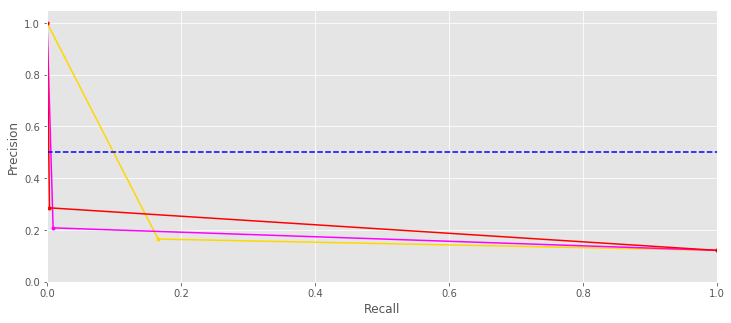

In [198]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

decisionTreePrecision, decisionTreeRecall, _ = precision_recall_curve(y_test, decisionTreeModelPredict)
plt.plot(decisionTreeRecall, decisionTreePrecision, color='gold', marker='.')

randomForestPrecision, randomForestRecall, _ = precision_recall_curve(y_test, randomForestModelPredict)
plt.plot(randomForestRecall, randomForestPrecision, color='magenta', marker='.')

logisticPrecision, logisticRecall, _ = precision_recall_curve(y_test, logisticModelPredict)
plt.plot(logisticRecall, logisticPrecision, color='red', marker='.')

plt.plot([0, 1], [0.5, 0.5], color='blue', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 360x360 with 0 Axes>

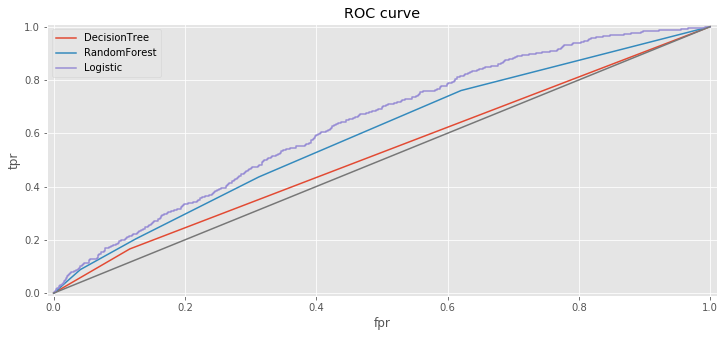

DecisionTree roc_auc 0.5249317363225638
RandomForest roc_auc 0.5922554408845535
Logistic roc_auc 0.6376227174332858


In [224]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(5, 5))
fig = plt.figure()

decisionTree_fpr, decisionTree_tpr, thresholds = roc_curve(y_test, decisionTreeModelPredictProba[:,1])
ax1 = fig.add_subplot(111)
ax1.plot(decisionTree_fpr, decisionTree_tpr, label='DecisionTree')

randomForest_fpr, randomForest_tpr, thresholds = roc_curve(y_test, randomForestModelPredictProba[:,1])
ax2 = fig.add_subplot(111)
ax2.plot(randomForest_fpr, randomForest_tpr, label='RandomForest')

logistic_fpr, logistic_tpr, thresholds = roc_curve(y_test, logisticModelPredictProba[:,1])
ax3 = fig.add_subplot(111)
ax3.plot(logistic_fpr, logistic_tpr, label='Logistic')

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()
plt.show()

print('DecisionTree roc_auc', roc_auc_score(y_test, decisionTreeModelPredictProba[:,1]))
print('RandomForest roc_auc', roc_auc_score(y_test, randomForestModelPredictProba[:,1]))
print('Logistic roc_auc', roc_auc_score(y_test, logisticModelPredictProba[:,1]))

In [229]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

dtc = DecisionTreeClassifier()
print('DecisionTreeClassifier')
print('-'*10)
print(
    cross_val_score(
    dtc,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
    )
)
print('\n')

rfc = RandomForestClassifier()
print('RandomForestClassifier')
print('-'*10)
print(
    cross_val_score(
    rfc,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
    )
)
print('\n')

lg = LogisticRegression()
print('LogisticRegression')
print('-'*10)
print(
    cross_val_score(
    lg,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
    )
)
print('\n')

DecisionTreeClassifier
----------
[0.4963575  0.52958422 0.53816352 0.56514963 0.54355183 0.51625482
 0.48508275 0.5201995  0.54799365 0.5053956 ]


RandomForestClassifier
----------
[0.55281628 0.60843106 0.54128073 0.52153099 0.59881546 0.58354115
 0.59215597 0.63881206 0.619202   0.62754477]


LogisticRegression
----------
[0.63432836 0.70233653 0.61720698 0.65639473 0.62295155 0.68678304
 0.64742689 0.66170936 0.63749717 0.64887781]




In [230]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
# Была выбрана модель LogisticRegression


y = df_train_preproc['TARGET']
X = df_train_preproc.drop('TARGET', axis=1)
y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop('TARGET', axis=1)

logisticModel = LogisticRegression()
logisticModel.fit(X, y)

predict = logisticModel.predict_proba(X_test)

Test roc_auc 0.6512198871037778


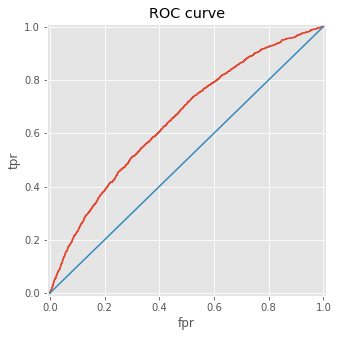

In [231]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('Test roc_auc', roc_auc_score(y_test, predict[:,1]))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)